In [5]:
from resources import *

/Users/pataan/Dropbox/DPhil/DAPPER


### Gaussian random variables

Consider the random variable with a Gaussian distribution with mean $\mu$ (`mu`) and variance $P$. We write its probability density function (pdf) as
$$ p(x) = N(x|\mu,P) = (2 \pi P)^{-1/2} e^{-(x-\mu)^2/2P} \, . $$

**Exc:** Code it up!

In [43]:
answers['pdf_G_1'] = ['MD',r'''
    return 1/sqrt(2*pi*P)*exp(-0.5*(xx-mu)**2/P)
    #return sp.stats.norm.pdf(xx,loc=mu,scale=sqrt(P))
''']
show_answer('pdf_G_1')

In [6]:
# Univariate (scalar), Gaussian pdf
def pdf_G_1(xx,mu,P):
    ### INSERT ANSWER ###
    return 1/sqrt(2*pi*P)*exp(-0.5*(xx-mu)**2/P)
    #return sp.stats.norm.pdf(xx,loc=mu,scale=sqrt(P))

<IPython.core.display.Javascript object>


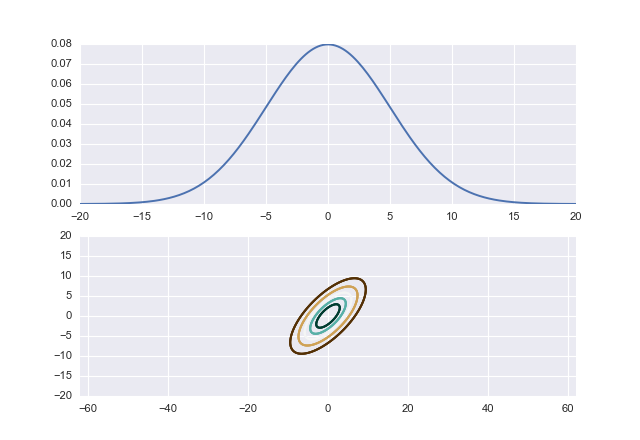

In [7]:
mu  = 0
P   = 25    
P12 = sqrt(P)

xx = linspace(-20,20,201)
plt.subplot(211)
plt.plot(xx,pdf_G_1(xx,mu,P));

This could for example be the density of a stochastic noise variable. It could also describe our uncertainty about a parameter (or state), which we model as randomness in the Bayesian paradigm.

The following code defines the pdf of the *multivariate* Gaussian. Take a moment to digest the code.

In [8]:
from numpy.linalg import det, inv

def weighted_norm22(xx,W):
    # W : the weighting matrix.
    # xx: $N$-by-$m$, where m len(xx[n])==m for all n in 1...N.
    return np.sum((xx @ W) * xx, axis=1)

def pdf_G_m(xx,mu,P):
    return 1/sqrt(det(2*pi*P))*exp(-0.5*weighted_norm22(xx-mu,inv(P)))

This plots it (above) as contour (equi-density) curves.

In [13]:
def list_2_array(grid): return array([xi.ravel() for xi in grid]).T
def square_reshape(X):  return X.reshape(int(sqrt(len(X))),-1)

grid       = np.meshgrid(xx,xx)
grid       = list_2_array(grid)
pdf_values = pdf_G_m(grid, 0, P*array([[1,0.7],[0.7,1]]))
pdf_values = square_reshape(pdf_values)

plt.subplot(212)
plt.contour(xx,xx,pdf_values);
plt.axis('equal');

### Bayes' rule

Bayes' rule is how we do inference. For continuous random variables, $x$ and $y$, it reads:

The "posterior" (pdf of $x$ given $y$) is the "prior" (pdf of $x$) times the "likelihood" (of $y$ given $x$), normalized.

$$ p(x|y) = \frac{p(x) \, p(y|x)}{p(y)} \, .$$

**Exc:** Derive Bayes' rule from the definition of conditional pdf's.

In [42]:
answers['BR deriv'] = ['MD',r'''
[Wiki](https://en.wikipedia.org/wiki/Bayes%27_theorem#Derivation)
''']
show_answer('BR deriv')

Numerically, the distributions may be represented by their values on a grid. Bayes' rule the consists of *(grid-)pointwise* multiplication, as shown below.

In [10]:
def Bayes_rule(prior_values,lklhd_values,dx):
    posterior_values = prior_values*lklhd_values
    posterior_values /= sum(posterior_values)*dx # normalization
    return posterior_values

**Exc:** Why does `Bayes_rule` not need to know the denominator, $p(y)$?

In [41]:
answers['BR grid normalization'] = ['MD',r'''
Because $p(y) = \int p(x,y) \, dx = \int p(x) p(y|x) \, dx$, 
which is what gets computed by the sum over the grid values together with `dx`.
''']
show_answer('BR grid normalization')

In higher dimensions, (pointwise) multiplication becomes a preposterious notion.

**Exc:** How many point-multiplications are needed on a grid with $m_{grid}$ points in $d$ dimensions?

In [40]:
answers['num mult'] = ['MD',r'''
$(m_{grid})^d$
''']
show_answer('num mult')

#### Exc 'Gaussian Bayes':
Derive the expression for the posterior of a Gaussian prior $N(x|b,B)$ and a Gaussian likelihood $N(y|x,R)$.

In [80]:
answers['BR Gauss'] = ['MD',r'''
We can ignore all factors that do not depend on $x$.
\begin{align}
p(x|y) &= \frac{p(x) \, p(y|x)}{p(y)}
\propto p(x) \, p(y|x) \\\
&\propto N(x|b,B) \, N(y|x,R) \\\
&\propto \exp \Big( \frac{-1}{2} \Big( (x-b)^2/B + (x-y)^2/B\Big) \Big) \\\
&\propto \exp \Big( \frac{-1}{2} \Big( (1/B + 1/R)x^2 - 2(b/B + y/R)x \Big) \Big) \\\
&\propto \exp \Big( \frac{-1}{2} \Big( x - \frac{b/B + y/R}{1/B + 1/R} \Big)^2 \cdot (1/B + 1/R) \Big) \\\
&\propto N(x|\mu,P) \, ,
\end{align}
i.e., by identification,
$ p(x|y) = N(x|\mu,P) \, ,$
with
\begin{align}
    P &= 1/(1/B + 1/R) \, , \\\
  \mu &= P(b/B + y/R) \, .
\end{align}
''']
show_answer('BR Gauss')

**Exc:** Use some algebra (only!) to show that
\begin{align}
    P &= (1-K)B \, , \\\
  \mu &= b + K (y-x) \, ,
\end{align}
where $K = B/(B+R)$, which is called the "Kalman gain".

**Exc:** Why is $K$ a "gain"?

In [85]:
answers['KG 2'] = ['MD',r'''
 * Because it drags the estimate from $b$ "towards" $y$. Because it is beteen 0 and 1.
   It weights the observation noise level (R) vs. the total noise level (B+R).
   In the multivariate case, the same holds for its eigenvectors (if $H=I$).
''']
show_answer('KG 2')

**Exc**: Write a Gaussian-Gaussian Bayes' rule.

In [86]:
answers['BR Gauss code'] = ['MD',r'''
    P  = 1/(1/B+1/R)
    mu = P*(b/B+y/R)
    #     KG = B/(B+R)
    #     P  = (1-KG)*B
    #     mu = b + KG*(y-mu)
''']
show_answer('BR Gauss code')

In [34]:
def Bayes_rule_Gaussian(b,B,y,R):
    ### INSERT ANSWER HERE ###
    P  = 1/(1/B+1/R)
    mu = P*(b/B+y/R)
    #     KG = B/(B+R)
    #     P  = (1-KG)*B
    #     mu = b + KG*(y-mu)
    return mu,P

The code below show's Bayes' rule in action on Gaussian pdfs.

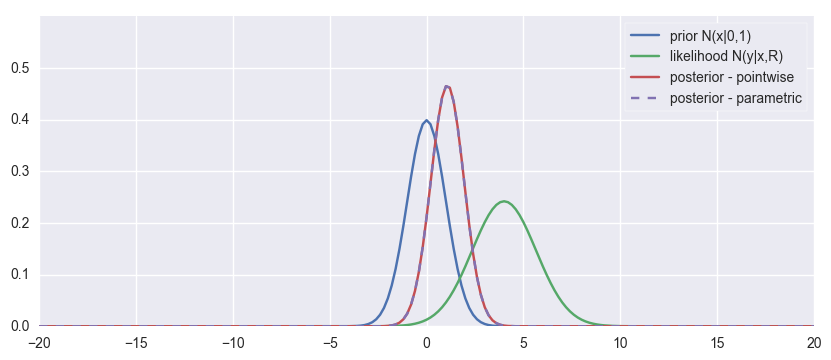

In [87]:
%matplotlib inline
b = 0
B = 1
@interact(y=(-10,10,1),log_R=(-2,5,0.5))
def animate_Gaussian_Bayes(y=4.0,log_R=1):
    R = exp(log_R)

    prior     = lambda x: pdf_G_1(x,b,B)
    lklhd     = lambda x: pdf_G_1(y,x,R)
    
    post_vals = Bayes_rule(prior(xx),lklhd(xx),xx[1]-xx[0])
    mu, P     = Bayes_rule_Gaussian(b,B,y,R)
    postr     = lambda x: pdf_G_1(x,mu,P)
    
    plt.figure(figsize=(10,4))
    plt.plot(xx,prior(xx)     ,label='prior N(x|0,1)')
    plt.plot(xx,lklhd(xx)     ,label='likelihood N(y|x,R)')
    plt.plot(xx,post_vals     ,label='posterior - pointwise')
    plt.plot(xx,post_vals,'--',label='posterior - parametric')
    plt.ylim(ymax=0.6)
    plt.legend()
    plt.show()

**Exc:** 
 * Does the width (or scale) for the posterior depend on the location $y$ of the likelihood?
 * Is the width (or scale) for the posterior always smaller that that of prior and likelihood? What does this mean information-wise?
 * Is this always the case, also for non-Gaussian distributions?
 * What if you're pretty sure about something, and you get a wildly different indication (observation). What is your posterior certainty?

**Exc:** Why are we so fond of the Gaussian assumption?

In [1]:
show_answer('why Gaussian')

NameError: name 'show_answer' is not defined

### Next: [Univariate (scalar) Kalman filtering](T3 - Univariate Kalman filtering.ipynb)